Code, adapted from article:https://gregfeliu.medium.com/viewing-population-within-a-country-how-to-create-cartograms-and-visualize-centroids-with-python-205a3d177542 (with some changes)

First, install geopandas & geoplot (for Anaconda)

https://anaconda.org/conda-forge/geopandas


https://anaconda.org/conda-forge/geoplot

Other pre-requisites:

- your data file (e.g. population size per area)
- area shape file (e.g. geojson)

In [1]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
pd.options.mode.chained_assignment = None 

Combine the two data sources into a single GeoDataFrame (a GeoPandas object)

In [2]:
prov_gdf = gpd.read_file("it_provinces_shapes.json", driver='geojson')
provinces_df = pd.read_csv("provinces.csv")

In [3]:
provinces_df.drop([107], inplace=True)

In [4]:
provinces_df

,Type,Province,Capital,Code,Region,Macroregion,Population (2019)[3],Area(km²),Density(p/km²),Comuni,President
0,F,Agrigento,Agrigento,AG,Sicily,Insular,"434,870","3,053",144,43,Marcello Maisano (commissioner)
1,O,Alessandria,Alessandria,AL,Piedmont,North-West,"421,284","3,559",119,188,Gianfranco Lorenzo Baldi (R)
2,O,Ancona,Ancona,AN,Marche,Centre,"471,228","1,963",241,47,Liana Serrani (L)
3,D,Aosta,Aosta,AO,Aosta Valley,North-West,"125,666","3,261",39,74,—
4,O,Arezzo,Arezzo,AR,Tuscany,Centre,"342,654","3,233",106,36,Roberto Vasai (L)
...,...,...,...,...,...,...,...,...,...,...,...
102,O,Vercelli,Vercelli,VC,Piedmont,North-West,"170,911","2,088",86,82,Carlo Riva Vercellotti (R)
103,O,Verona,Verona,VR,Veneto,North-East,"926,497","3,120",295,98,Antonio Pastorello (R)
104,O,Vibo Valentia,Vibo Valentia,VV,Calabria,South,"160,073","1,139",146,50,Andrea Niglia (I)
105,O,Vicenza,Vicenza,VI,Veneto,North-East,"862,418","2,723",320,119,Francesco Rucco (R)


Select the columns needed, convert population to integers.

In [5]:
provinces_df = provinces_df[["Province", "Population (2019)[3]", "Code", "Density(p/km²)"]]
provinces_df['Population'] = provinces_df["Population (2019)[3]"].str.replace(',', '').astype(int)
provinces_df['Density'] = provinces_df["Density(p/km²)"].str.replace(',', '').astype(int)

In [6]:


min_val = provinces_df['Population'].min()
max_val = provinces_df['Population'].max()
st_dev = provinces_df['Population'].std()
provinces_df['Population_norm'] = (provinces_df['Population']- provinces_df['Population'].mean()) /(max_val - min_val)
provinces_df['Population_standardised'] = (provinces_df['Population']- provinces_df['Population'].mean()) /st_dev

In [7]:
provinces_df.columns

Index(['Province', 'Population (2019)[3]', 'Code', 'Density(p/km²)',
       'Population', 'Density', 'Population_norm', 'Population_standardised'],
      dtype='object')

Ensure provinces file has a code column, split hasc_2 to achieve this.

In [8]:
prov_gdf[['Country', 'Code']] = prov_gdf['hasc_2'].str.split('.', 1, expand=True)

In [9]:
prov_gdf

,id,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry,Country,Code
0,mn871sp9778.1,112,ITA,Italy,1,Abruzzo,1,Chieti,IT.CH,0,69,Provincia,Province,None,None,"MULTIPOLYGON (((14.25403 42.44514, 14.25403 42...",IT,CH
1,mn871sp9778.2,112,ITA,Italy,1,Abruzzo,2,L'Aquila,IT.AQ,0,66,Provincia,Province,None,Aquila,"MULTIPOLYGON (((13.40441 42.57731, 13.40542 42...",IT,AQ
2,mn871sp9778.3,112,ITA,Italy,1,Abruzzo,3,Pescara,IT.PE,0,68,Provincia,Province,None,None,"MULTIPOLYGON (((14.07483 42.54282, 14.07576 42...",IT,PE
3,mn871sp9778.4,112,ITA,Italy,1,Abruzzo,4,Teramo,IT.TE,0,67,Provincia,Province,None,None,"MULTIPOLYGON (((13.91542 42.89561, 13.91542 42...",IT,TE
4,mn871sp9778.5,112,ITA,Italy,2,Apulia,5,Bari,IT.BB,0,72,Provincia,Province,None,None,"MULTIPOLYGON (((17.28370 40.77928, 17.28340 40...",IT,BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,mn871sp9778.109,112,ITA,Italy,20,Veneto,106,Rovigo,IT.RO,0,29,Provincia,Province,None,None,"MULTIPOLYGON (((12.41680 44.82903, 12.41680 44...",IT,RO
109,mn871sp9778.110,112,ITA,Italy,20,Veneto,107,Treviso,IT.TV,0,26,Provincia,Province,None,Trévise,"MULTIPOLYGON (((12.35548 46.07705, 12.36288 46...",IT,TV
110,mn871sp9778.111,112,ITA,Italy,20,Veneto,108,Venezia,IT.VE,0,27,Provincia,Province,None,Venecia|Venedig|Veneza|Venezia|Venise|,"MULTIPOLYGON (((12.33236 45.16403, 12.33236 45...",IT,VE
111,mn871sp9778.112,112,ITA,Italy,20,Veneto,109,Verona,IT.VR,0,23,Provincia,Province,None,Vérone,"MULTIPOLYGON (((10.87383 45.78948, 10.87461 45...",IT,VR


Merge provinces' borders by code

In [10]:
prov_gdf2 = prov_gdf.dissolve(by='Code')

Merge both data files on "Code"

In [11]:
provinces_data_gdf = prov_gdf2.merge(provinces_df, on='Code', how='inner')

In [12]:
provinces_data_gdf.describe()

,id_0,id_1,id_2,ccn_2,Population,Density,Population_norm,Population_standardised
count,94.0,94.000000,94.000000,94.0,9.400000e+01,94.000000,94.000000,94.000000
mean,112.0,10.585106,55.510638,0.0,5.178291e+05,221.127660,-0.010869,-0.075052
std,0.0,5.476066,32.903163,0.0,5.226189e+05,168.577173,0.122743,0.847554
min,112.0,1.000000,1.000000,0.0,8.437900e+04,39.000000,-0.112670,-0.777997
25%,112.0,6.000000,28.250000,0.0,2.406318e+05,111.250000,-0.075972,-0.524595
50%,112.0,10.000000,52.500000,0.0,3.773030e+05,185.500000,-0.043873,-0.302949
75%,112.0,15.000000,86.750000,0.0,5.845058e+05,275.500000,0.004791,0.033080
max,112.0,20.000000,110.000000,0.0,4.342212e+06,1116.000000,0.887330,6.127115


The provinces are resized according to population size (blue disjointed shapes.) 
The cartogram grows or shrinks polygons to represent a dimension of data

The map underneath is provided for reference.


<GeoAxesSubplot:>

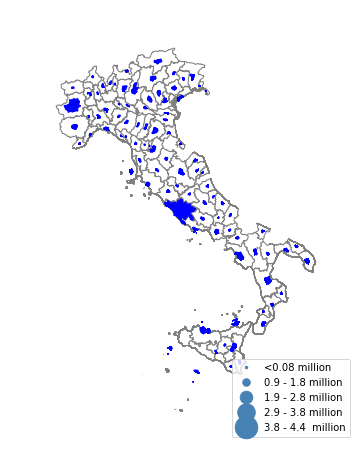

In [14]:
ax1 = gplt.cartogram(provinces_data_gdf, scale='Population_standardised', projection=gplt.crs.AlbersEqualArea(), figsize=(8,8), limits=(0.1, .9), color = 'blue', legend=True, legend_kwargs={'loc': 'lower right'}, legend_labels=[
        '<0.08 million', '0.9 - 1.8 million', '1.9 - 2.8 million',
        '2.9 - 3.8 million', '3.8 - 4.4  million'])
gplt.polyplot(provinces_data_gdf, facecolor='white', edgecolor='grey', ax=ax1)


The provinces are resized according to population density (green disjointed shapes.) The cartogram grows or shrinks polygons to represent a dimension of data

The map underneath is provided for reference.

<GeoAxesSubplot:>

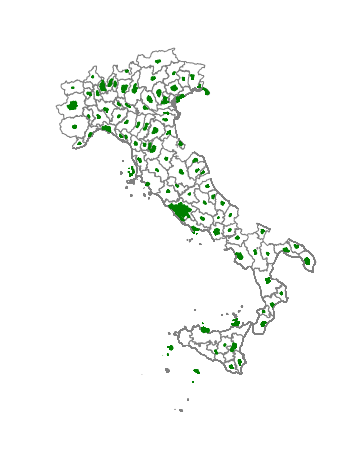

In [15]:
ax2 = gplt.cartogram(provinces_data_gdf, scale='Density', projection=gplt.crs.AlbersEqualArea(), figsize=(8,8), limits=(0.1, .9), color = 'green')
gplt.polyplot(provinces_data_gdf, facecolor='white', edgecolor='grey', ax=ax2)

Other tutorials:
    
https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621
